[dataset here:](https://drive.google.com/file/d/1kcP0tqL5lM7t6ITLohk4oGLnuMi8GSR3/view?usp=sharing)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.drop(columns =["PassengerId", "Name", "Ticket", "Cabin"], inplace = True )

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.drop(columns =['Sex', 'Embarked']).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
df.groupby("Sex")["Survived"].value_counts(normalize= True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [21]:
df.groupby("Embarked")["Survived"].value_counts(normalize= True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: proportion, dtype: float64

In [22]:
df.groupby("Embarked")[["Sex"]].value_counts(normalize= True)

Embarked  Sex   
C         male      0.565476
          female    0.434524
Q         male      0.532468
          female    0.467532
S         male      0.684783
          female    0.315217
Name: proportion, dtype: float64

In [23]:
df["Embarked"].nunique()

3

In [24]:
df["Pclass"].nunique()

3

In [25]:
df.groupby("SibSp")["Survived"].value_counts(normalize= True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: proportion, dtype: float64

In [26]:
df[df["SibSp"]==8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,male,NaN,8,2,69.55,S
180,0,3,female,NaN,8,2,69.55,S
201,0,3,male,NaN,8,2,69.55,S
324,0,3,male,NaN,8,2,69.55,S
792,0,3,female,NaN,8,2,69.55,S
846,0,3,male,NaN,8,2,69.55,S
863,0,3,female,NaN,8,2,69.55,S


Text(0, 0.5, 'Count')

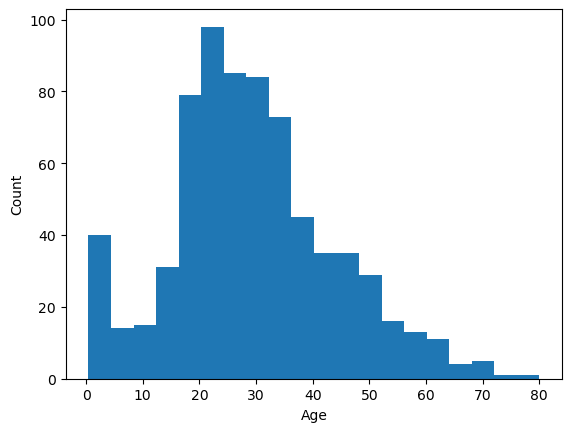

In [27]:
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")

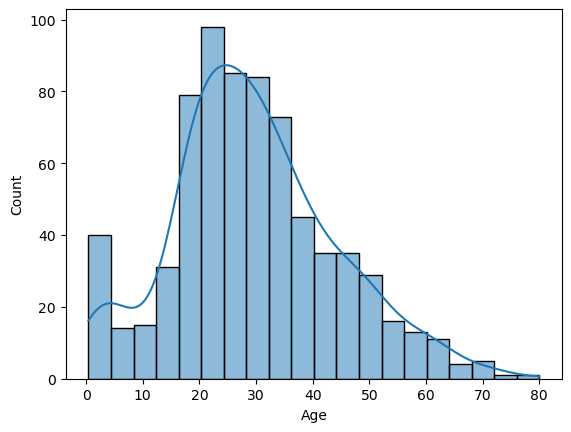

In [29]:
sns.histplot(data=df, x='Age', kde=True);

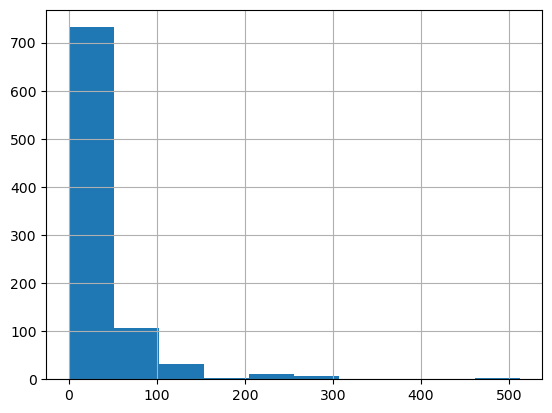

In [31]:
df["Fare"].hist();

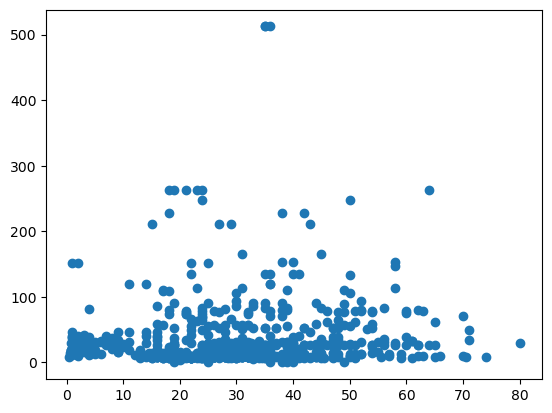

In [32]:
plt.scatter(df["Age"], df["Fare"]);

In [33]:
df[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [34]:
v=df.groupby("SibSp")['Survived'].sum()

In [35]:
v

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

<BarContainer object of 7 artists>

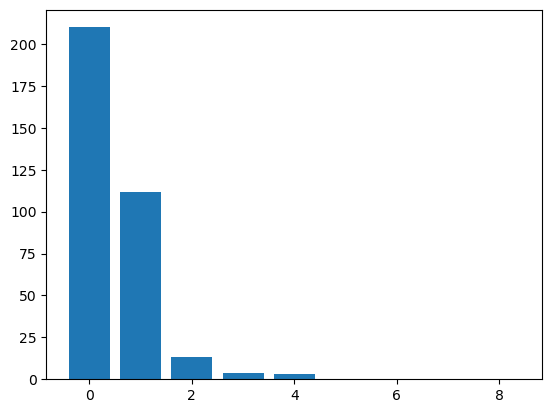

In [36]:
plt.bar(v.index, v.values)

<Axes: xlabel='SibSp', ylabel='Survived'>

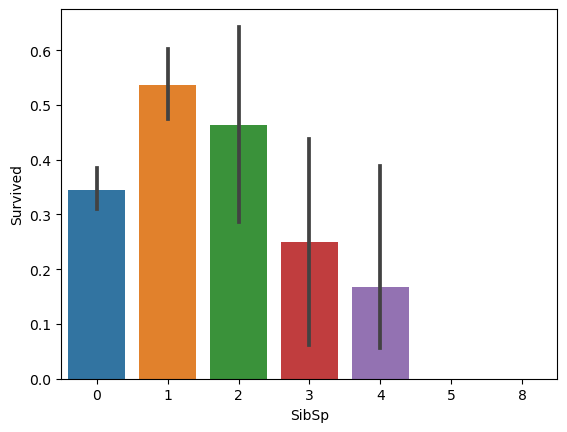

In [37]:
sns.barplot(data= df, x= 'SibSp', y='Survived')

In [38]:
df["Age"]= df["Age"].fillna(value=df["Age"].median())

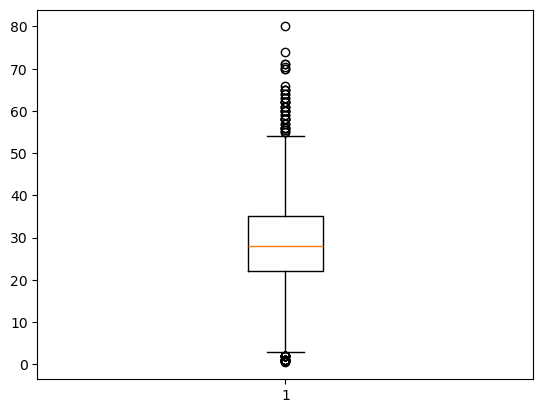

In [40]:
plt.boxplot(df["Age"]);

<Axes: xlabel='Survived', ylabel='Age'>

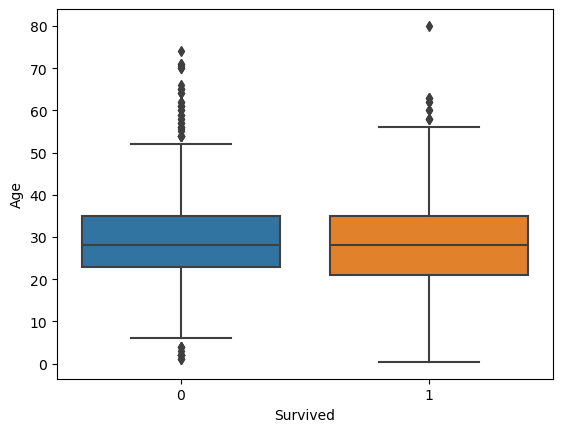

In [41]:
sns.boxplot(data=df, y='Age', x='Survived')

<Axes: xlabel='Age'>

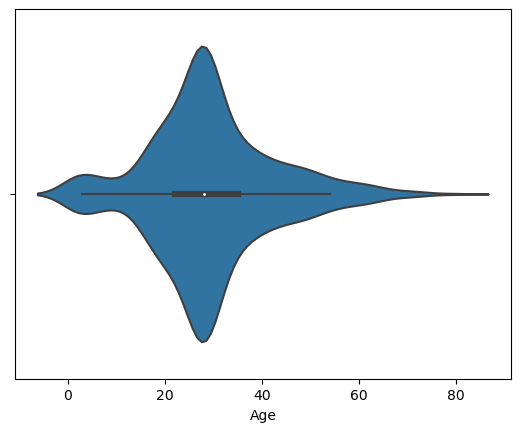

In [42]:
sns.violinplot(data=df, x='Age')

In [44]:
df [df['Age']>50]['Survived'].value_counts(normalize=True)

Survived
0    0.65625
1    0.34375
Name: proportion, dtype: float64

In [46]:
v= df.groupby(['Sex'])['Survived'].value_counts()
v

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

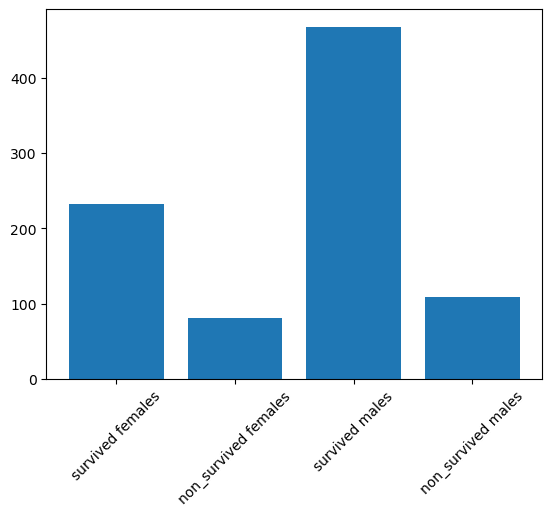

In [49]:
plt.bar(['survived females', 'non_survived females', 'survived males', 'non_survived males'], v.values)
plt.xticks(rotation=45);